In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split,  GridSearchCV, TimeSeriesSplit
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import numpy as np

In [4]:
set1 = pd.read_csv('../Data/SET_main.csv')
macro = pd.read_csv('../Data/macro_data.csv')

In [5]:
macro= macro.set_index('Date')
set1 = set1.set_index('Date')

In [9]:
macro

,Interest_Rate,GDP,Unemployment,Inflation_x
Date,,,,
2012-10-01,NaN,16420.419,NaN,NaN
2012-12-01,0.16,16420.419,7.9,231.221
2013-01-01,0.14,16648.189,8.0,231.679
2013-02-01,0.15,16648.189,7.7,232.937
2013-03-01,0.14,16648.189,7.5,232.282
...,...,...,...,...
2024-07-01,5.33,29354.321,4.3,313.534
2024-08-01,5.33,29354.321,4.2,314.121
2024-09-01,5.13,29354.321,4.1,314.686


In [11]:
# Loop through each unique ticker (stock) in the DataFrame
indicator = pd.DataFrame()
for ticker in set1.columns:
    # Calculate SMAs 
    indicator[f'{ticker}_SMA3'] = set1[ticker].rolling(window=3).mean()
    indicator[f'{ticker}_SMA20'] = set1[ticker].rolling(window=20).mean()
    indicator[f'{ticker}_SMA50'] = set1[ticker].rolling(window=50).mean()
    indicator[f'{ticker}_SMA100'] = set1[ticker].rolling(window=100).mean()
    indicator[f'{ticker}_SMA200'] = set1[ticker].rolling(window=200).mean()
    
    # Calculate EMA
    indicator[f'{ticker}_EMA3'] = set1[ticker].ewm(span=3, adjust=False).mean()
    indicator[f'{ticker}_EMA12'] = set1[ticker].ewm(span=12, adjust=False).mean()
    indicator[f'{ticker}_EMA26'] = set1[ticker].ewm(span=26, adjust=False).mean()
    
    # Calculate MACD
    indicator[f'{ticker}_MACD'] = indicator[f'{ticker}_EMA12'] - indicator[f'{ticker}_EMA26']
    
    # Calculate Signal line (9-day EMA of the MACD)
    indicator[f'{ticker}_signal'] = indicator[f'{ticker}_MACD'].ewm(span=9, adjust=False).mean()
    
    # Concatenate each ticker's results into the final indicator DataFrame
    indicator = pd.concat([indicator, set1], axis=1)

In [12]:
indicator = indicator.dropna()

In [15]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Merge all the files that have X-variable (features)
features_df = pd.merge(macro, indicator, on='Date', how='outer')
features_df = features_df.fillna(method='ffill').dropna()

In [17]:
# drop the same column names
features_df = features_df.loc[:, ~features_df.columns.duplicated()]

In [19]:
# Make the rows number the same with target and features files
# set the index to the format Datetime
set1.index = pd.to_datetime(set1.index)
features_df.index = pd.to_datetime(features_df.index)

# Align the two DataFrames by finding the intersection of their indices
common_index = set1.index.intersection(features_df.index)

# Reindex both DataFrames to the common index
set1 = set1.loc[common_index]
features_df = features_df.loc[common_index]

In [21]:
features_df.shape, set1.shape

((2463, 224), (2463, 20))

Processing stock: ADVANC.BK
Training set shape for ADVANC.BK: X_train: (2100, 3), y_train: (2100,)
Testing set shape for ADVANC.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for ADVANC.BK: {'alpha': 100}
Performance for ADVANC.BK - RMSE: 2.784732897206045


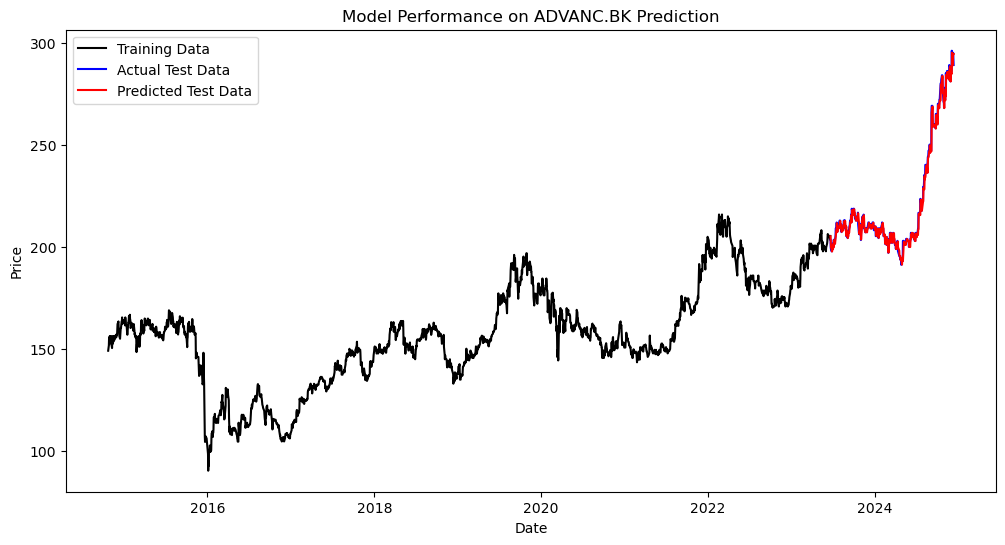

Processing stock: AOT.BK
Training set shape for AOT.BK: X_train: (2100, 3), y_train: (2100,)
Testing set shape for AOT.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for AOT.BK: {'alpha': 1}
Performance for AOT.BK - RMSE: 0.7176670030831508


<Figure size 640x480 with 0 Axes>

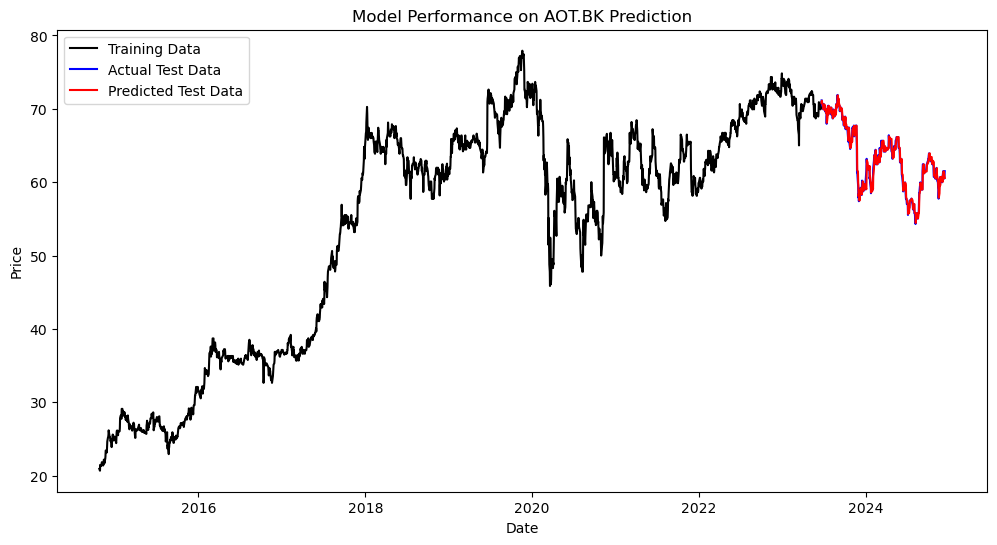

Processing stock: BBL.BK
Training set shape for BBL.BK: X_train: (2100, 3), y_train: (2100,)
Testing set shape for BBL.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for BBL.BK: {'alpha': 0.01}
Performance for BBL.BK - RMSE: 1.5897348070280373


<Figure size 640x480 with 0 Axes>

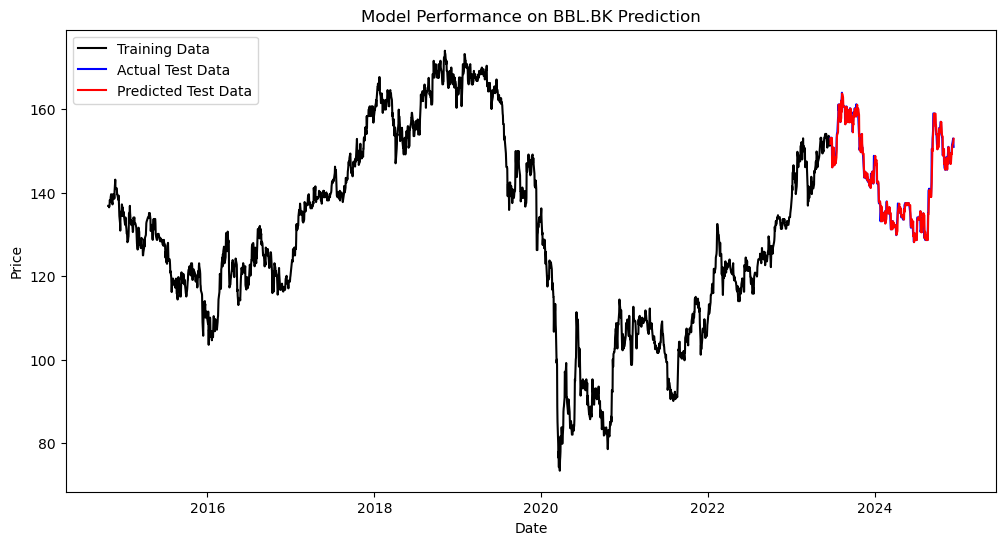

Processing stock: BDMS.BK
Training set shape for BDMS.BK: X_train: (2100, 3), y_train: (2100,)
Testing set shape for BDMS.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for BDMS.BK: {'alpha': 1}
Performance for BDMS.BK - RMSE: 0.37258431322209123


<Figure size 640x480 with 0 Axes>

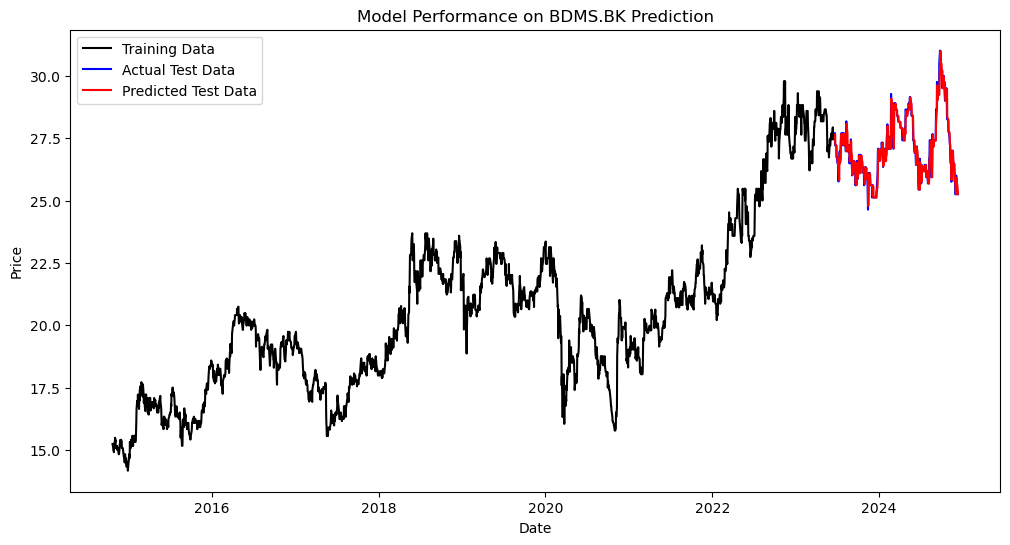

Processing stock: BH.BK
Training set shape for BH.BK: X_train: (2100, 3), y_train: (2100,)
Testing set shape for BH.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for BH.BK: {'alpha': 0.01}
Performance for BH.BK - RMSE: 4.01380750934197


<Figure size 640x480 with 0 Axes>

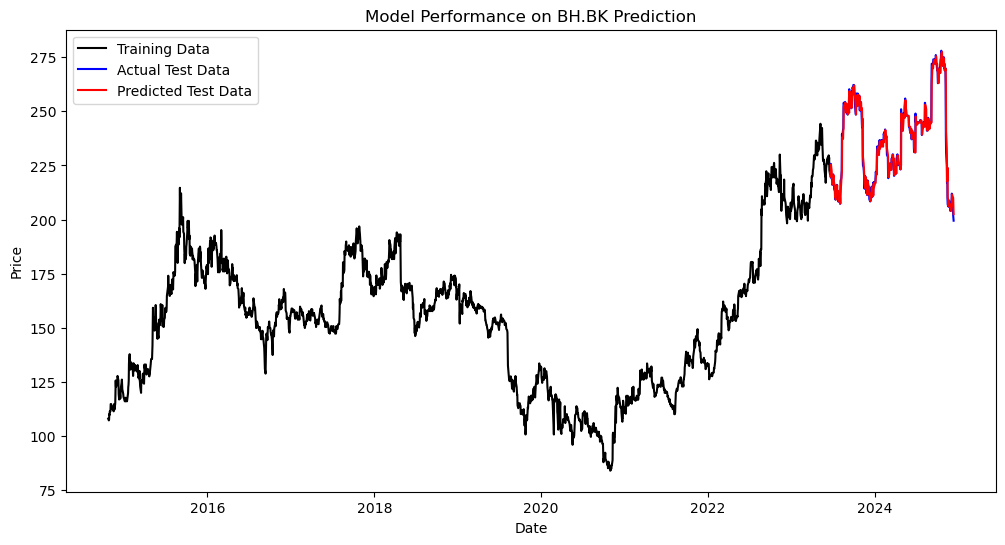

Processing stock: CPALL.BK
Training set shape for CPALL.BK: X_train: (2100, 3), y_train: (2100,)
Testing set shape for CPALL.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for CPALL.BK: {'alpha': 1}
Performance for CPALL.BK - RMSE: 0.7494040335575616


<Figure size 640x480 with 0 Axes>

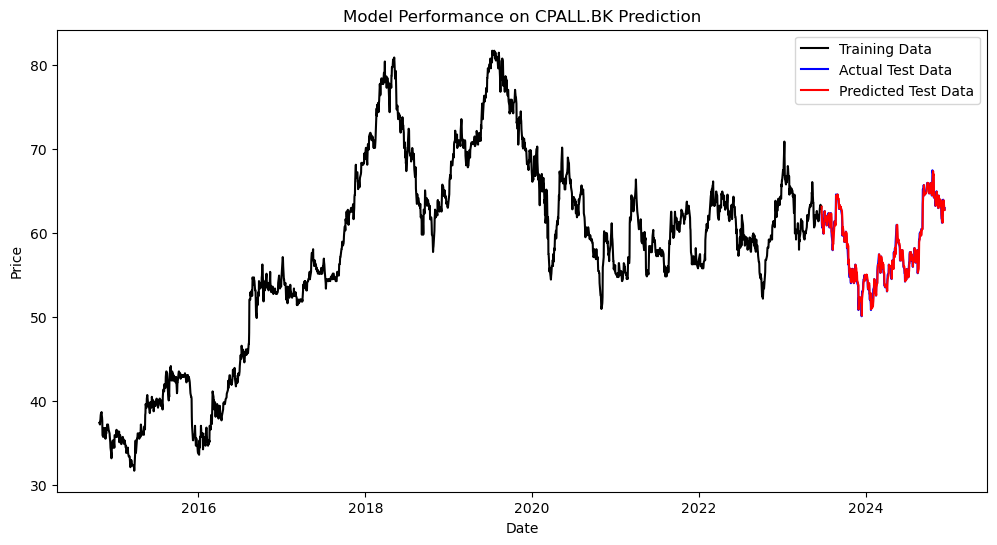

Processing stock: CPF.BK
Training set shape for CPF.BK: X_train: (2100, 3), y_train: (2100,)
Testing set shape for CPF.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for CPF.BK: {'alpha': 10}
Performance for CPF.BK - RMSE: 0.31078070971785143


<Figure size 640x480 with 0 Axes>

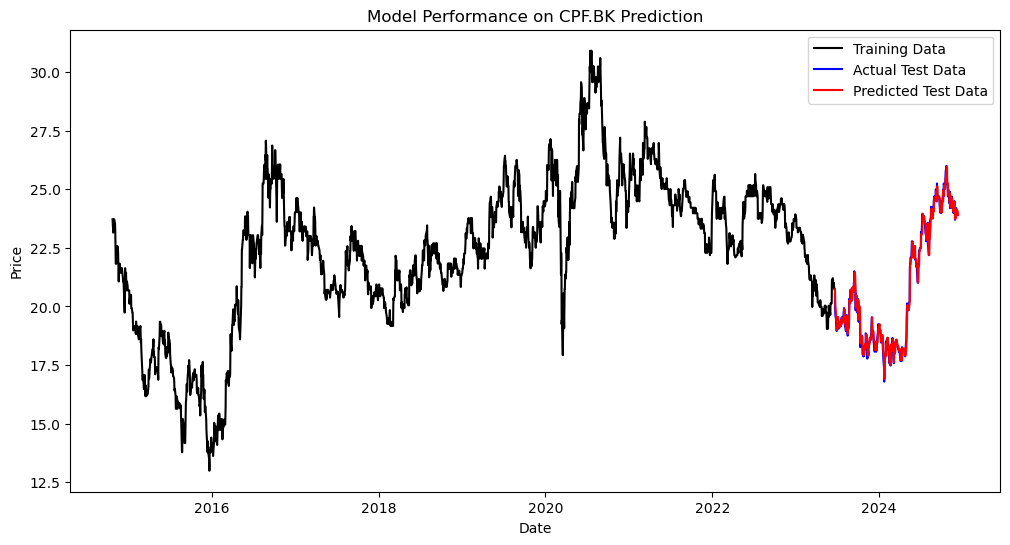

Processing stock: CPN.BK
Training set shape for CPN.BK: X_train: (2100, 3), y_train: (2100,)
Testing set shape for CPN.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for CPN.BK: {'alpha': 0.01}
Performance for CPN.BK - RMSE: 0.9155625935380928


<Figure size 640x480 with 0 Axes>

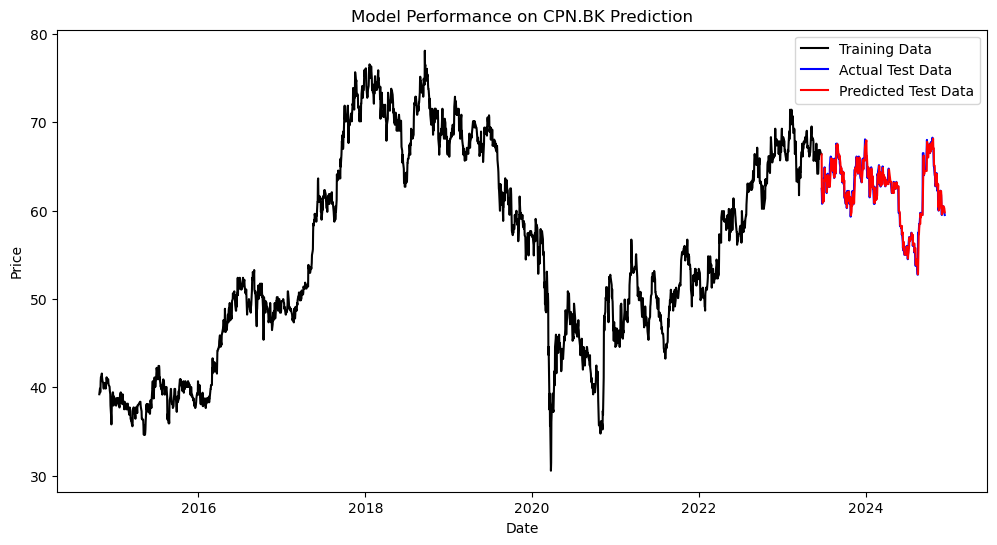

Processing stock: DELTA.BK
Training set shape for DELTA.BK: X_train: (2100, 3), y_train: (2100,)
Testing set shape for DELTA.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for DELTA.BK: {'alpha': 0.01}
Performance for DELTA.BK - RMSE: 3.083720593217628


<Figure size 640x480 with 0 Axes>

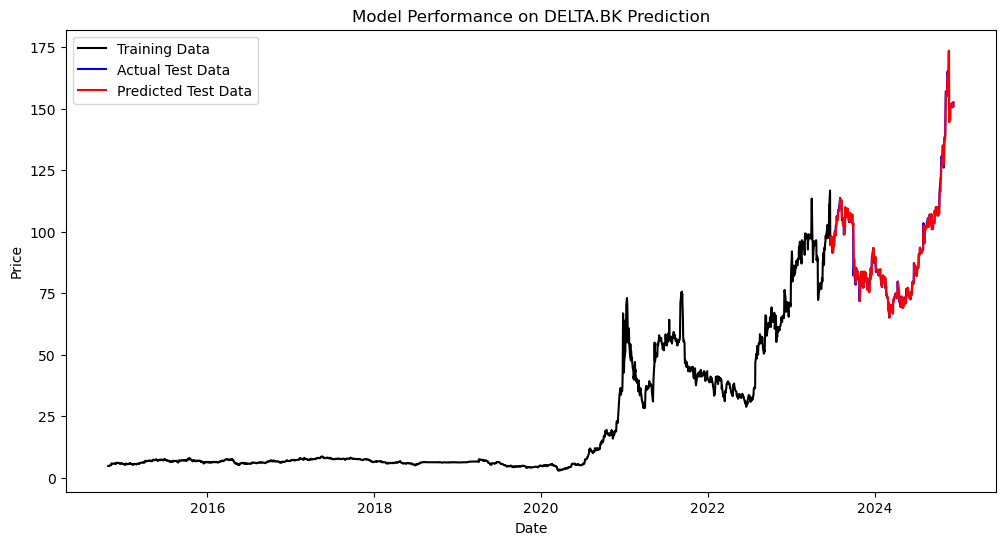

Processing stock: HMPRO.BK
Training set shape for HMPRO.BK: X_train: (2100, 3), y_train: (2100,)
Testing set shape for HMPRO.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for HMPRO.BK: {'alpha': 1}
Performance for HMPRO.BK - RMSE: 0.1744578797135414


<Figure size 640x480 with 0 Axes>

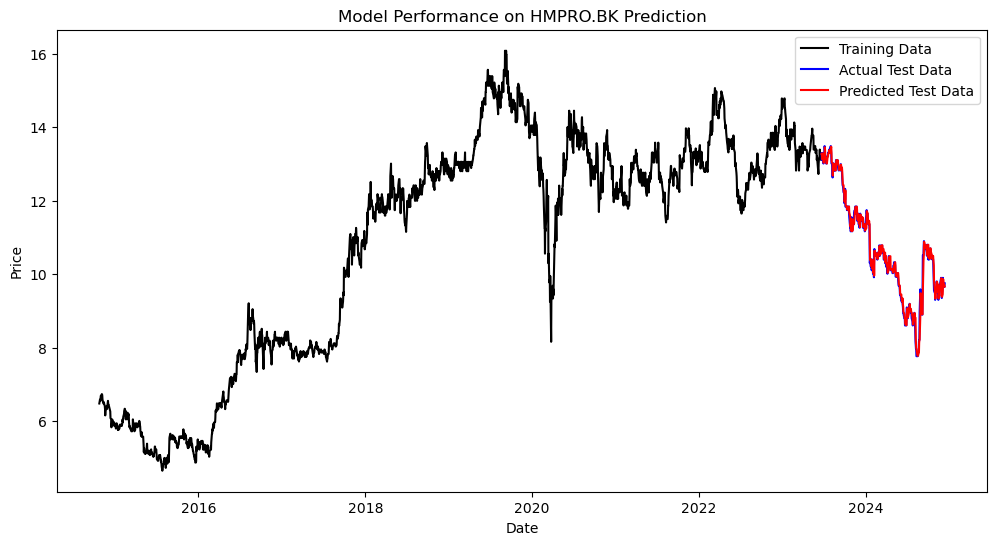

Processing stock: INTUCH.BK
Training set shape for INTUCH.BK: X_train: (2100, 3), y_train: (2100,)
Testing set shape for INTUCH.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for INTUCH.BK: {'alpha': 1}
Performance for INTUCH.BK - RMSE: 1.2286706917368755


<Figure size 640x480 with 0 Axes>

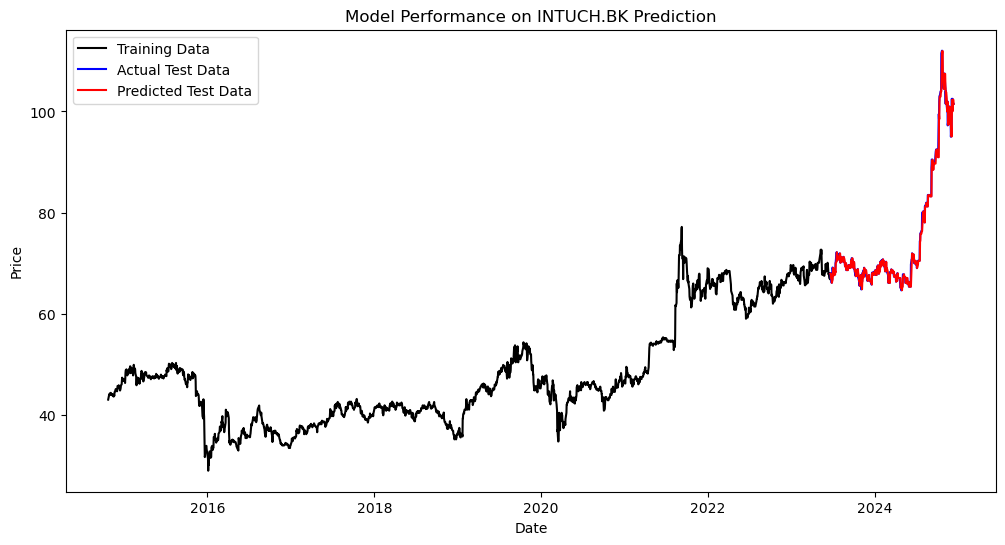

Processing stock: IVL.BK
Training set shape for IVL.BK: X_train: (2100, 3), y_train: (2100,)
Testing set shape for IVL.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for IVL.BK: {'alpha': 0.01}
Performance for IVL.BK - RMSE: 0.5707100278913896


<Figure size 640x480 with 0 Axes>

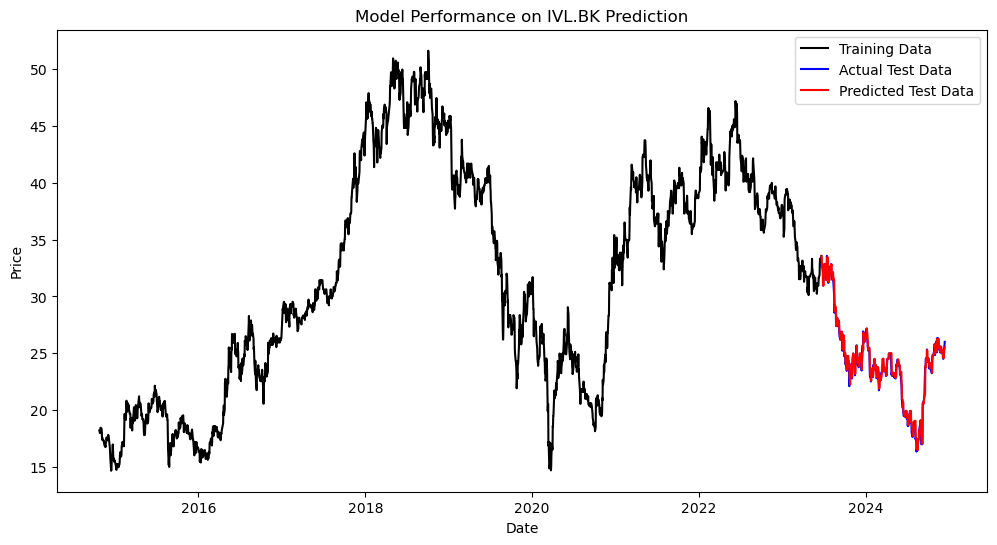

Processing stock: KBANK.BK
Training set shape for KBANK.BK: X_train: (2100, 3), y_train: (2100,)
Testing set shape for KBANK.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for KBANK.BK: {'alpha': 100}
Performance for KBANK.BK - RMSE: 1.4788633866478738


<Figure size 640x480 with 0 Axes>

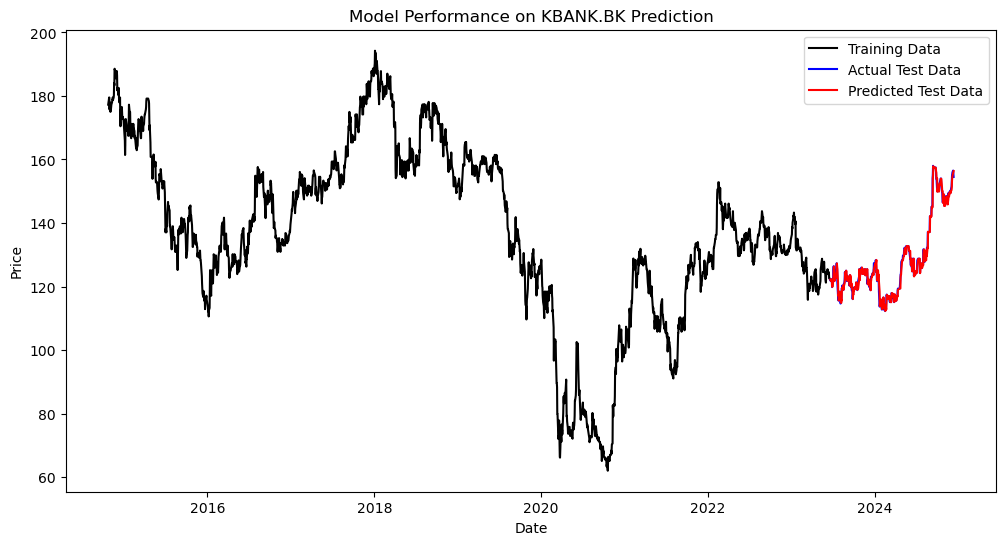

Processing stock: KTB.BK
Training set shape for KTB.BK: X_train: (2100, 3), y_train: (2100,)
Testing set shape for KTB.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for KTB.BK: {'alpha': 0.01}
Performance for KTB.BK - RMSE: 0.23262944702597066


<Figure size 640x480 with 0 Axes>

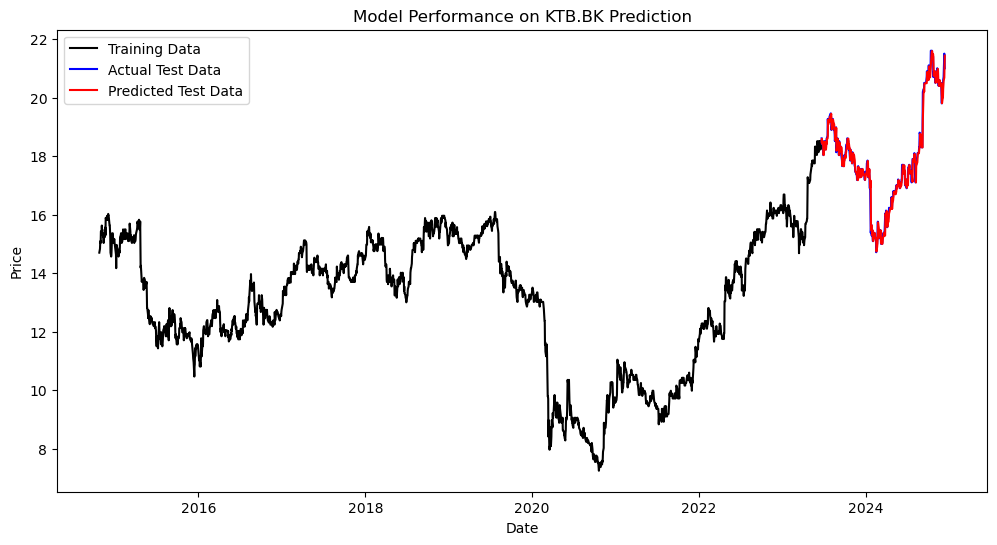

Processing stock: MINT.BK
Training set shape for MINT.BK: X_train: (2100, 3), y_train: (2100,)
Testing set shape for MINT.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for MINT.BK: {'alpha': 1}
Performance for MINT.BK - RMSE: 0.4659333907548792


<Figure size 640x480 with 0 Axes>

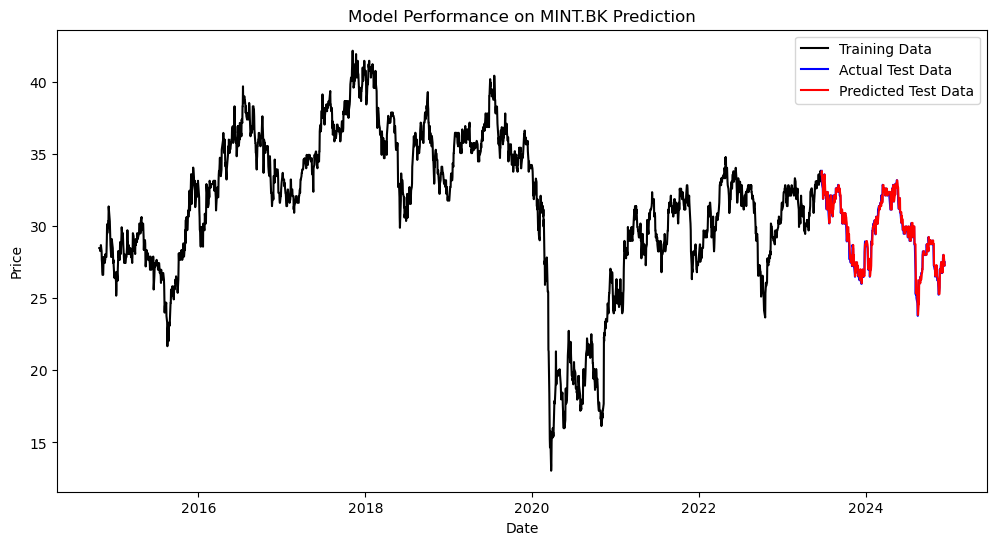

Processing stock: PTT.BK
Training set shape for PTT.BK: X_train: (2100, 3), y_train: (2100,)
Testing set shape for PTT.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for PTT.BK: {'alpha': 0.01}
Performance for PTT.BK - RMSE: 0.33897357817475454


<Figure size 640x480 with 0 Axes>

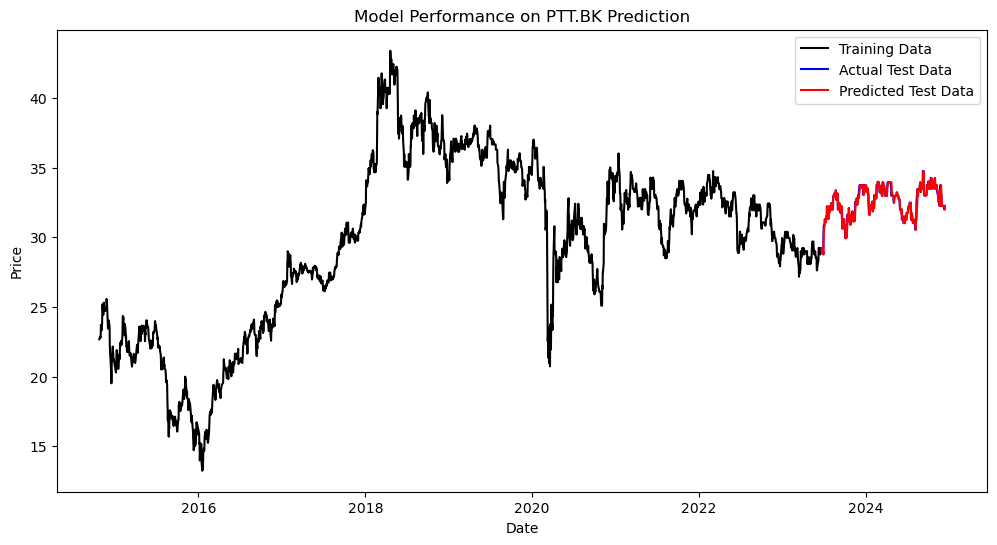

Processing stock: PTTEP.BK
Training set shape for PTTEP.BK: X_train: (2100, 3), y_train: (2100,)
Testing set shape for PTTEP.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for PTTEP.BK: {'alpha': 10}
Performance for PTTEP.BK - RMSE: 1.838970052709442


<Figure size 640x480 with 0 Axes>

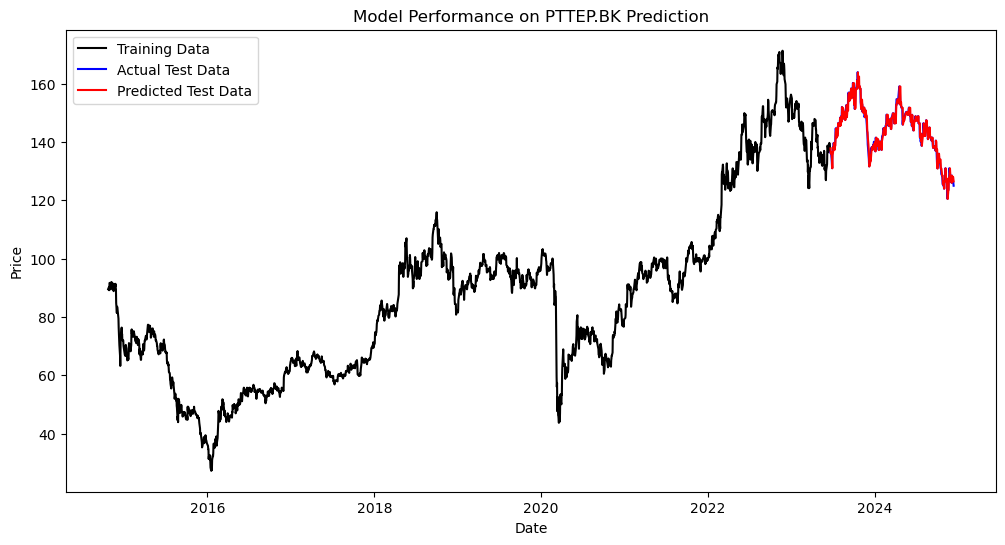

Processing stock: SCC.BK
Training set shape for SCC.BK: X_train: (2100, 3), y_train: (2100,)
Testing set shape for SCC.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for SCC.BK: {'alpha': 10}
Performance for SCC.BK - RMSE: 3.651391377905373


<Figure size 640x480 with 0 Axes>

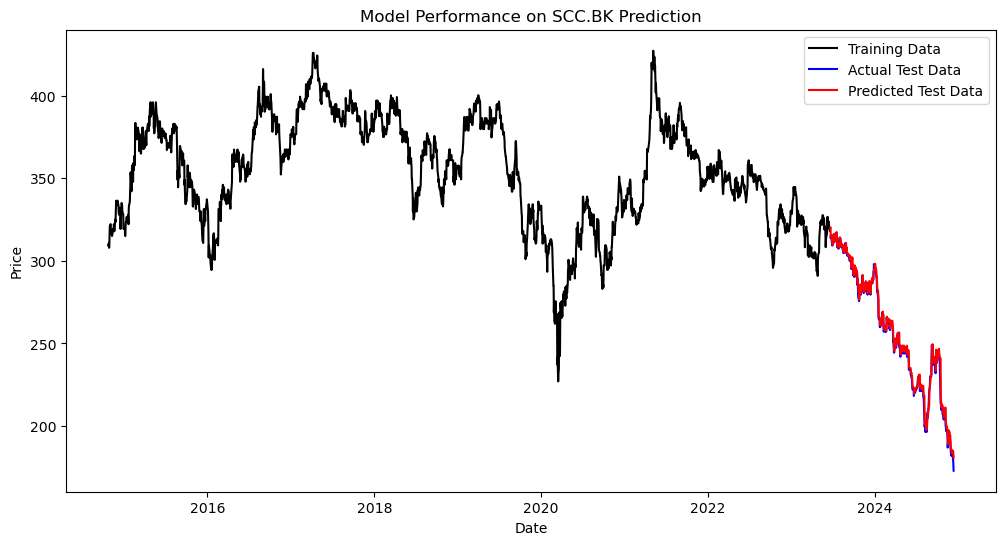

Processing stock: TRUE.BK
Training set shape for TRUE.BK: X_train: (2100, 3), y_train: (2100,)
Testing set shape for TRUE.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for TRUE.BK: {'alpha': 1}
Performance for TRUE.BK - RMSE: 0.16164884926591197


<Figure size 640x480 with 0 Axes>

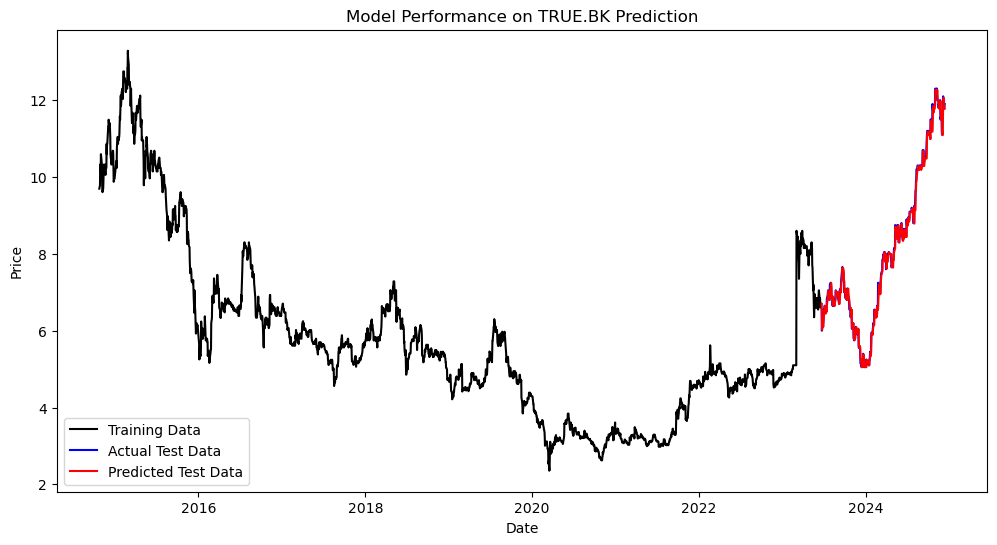

Processing stock: TTB.BK
Training set shape for TTB.BK: X_train: (2100, 3), y_train: (2100,)
Testing set shape for TTB.BK: X_test: (360, 3), y_test: (360,)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters for TTB.BK: {'alpha': 0.01}
Performance for TTB.BK - RMSE: 0.02277385953687893


<Figure size 640x480 with 0 Axes>

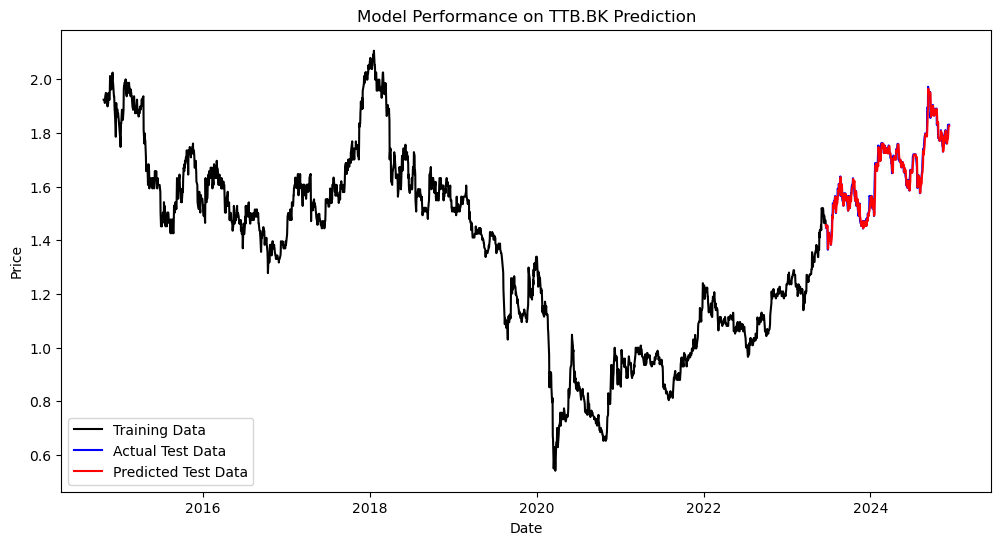

<Figure size 640x480 with 0 Axes>

In [23]:
# Initialize dictionaries to store results
results = {}

# Define the hyperparameter
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100] 
}

# Fixed test size for the last 360 rows
test_size = 360

# Time Series Split for cross-validation (preserves order)
tscv = TimeSeriesSplit(n_splits=3)

# Define function to create lag features
def create_lag_features(data, lags=3):
    df = pd.DataFrame()
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = data.shift(lag)
    df['target'] = data  
    return df.dropna()

# Loop through each stock in the set1 DataFrame
for stock in set1.columns:
    
    print(f"Processing stock: {stock}")
    
    # Prepare lag features for univariate prediction
    lagged_data = create_lag_features(set1[stock], lags=3)
    
    # Define training and testing sets
    X = lagged_data.drop(columns=['target']).values 
    y = lagged_data['target'].values                
    
    # Split data into train and test sets
    X_train, X_test = X[:-test_size], X[-test_size:]
    y_train, y_test = y[:-test_size], y[-test_size:]
    
    # Print dataset shapes
    print(f"Training set shape for {stock}: X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"Testing set shape for {stock}: X_test: {X_test.shape}, y_test: {y_test.shape}")
    
    # Initialize Ridge Regression model
    ridge_reg = Ridge()

    # Perform Grid ssearch
    grid_search = GridSearchCV(estimator=ridge_reg, 
                               param_grid=param_grid, 
                               cv=tscv, 
                               scoring='neg_mean_squared_error', 
                               verbose=1)
    
    # Fit the GridSearchCV model to the training data
    grid_search.fit(X_train, y_train)
    
    # Get the best hyperparameters from the grid search
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters for {stock}: {best_params}")
    
    # Use the best estimator found by GridSearchCV to make predictions
    best_model = grid_search.best_estimator_
    
    # Make predictions on the test data
    y_pred = best_model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f'Performance for {stock} - RMSE: {rmse}')
    
    # Store the results (model, predictions, evaluation metrics)
    results[stock] = {
        'model': best_model, 
        'predictions': y_pred,
        'mse': mse,
        'rmse': rmse
    }
    
    # Combine training and testing actual prices for visualization
    plt.figure(figsize=(12, 6))
    plt.plot(set1[stock].index[:-test_size], set1[stock].values[:-test_size], color='black', label='Training Data')
    plt.plot(set1[stock].index[-test_size:], set1[stock].values[-test_size:], color='blue', label='Actual Test Data')
    plt.plot(set1[stock].index[-test_size:], y_pred, color='red', label='Predicted Test Data')
    plt.title(f'Model Performance on {stock} Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Save the plot
    plt.savefig(f'../images/{stock}_ridge_prediction_uni.png', format='png')
